# ¡Hola Kevin!

Mi nombre es Sofia Arboleda, estaré ayudándote a revisar este proyecto para que quede en su mejor versión.

Para simular la dinámica de un ambiente de trabajo, si veo algún error, en primer instancia solo los señalaré, dándote la oportunidad de encontrarlos y corregirlos por tu cuenta. Esto es útil para que te acostumbres a un escenario laboral. En caso de que no puedas resolver la tarea, te daré una información más precisa en la próxima revisión.

Encontrarás mis comentarios más abajo - **por favor, no los muevas, no los modifiques ni los borres**.

¿Cómo funciona esta revisión? Leeré atentamente tu código y te señalaré tus fortalezas y aquellas cosas que podemos mejorar. Los comentarios aparecerán de esta forma:


<div class="alert alert-block alert-success">
<b>Comentario de la revisora</b> <a class="tocSkip"></a>

Si todo está perfecto y no se requieren cambios en el código.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario de la revisora</b> <a class="tocSkip"></a>

Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta. Se aceptan uno o dos comentarios de este tipo en el borrador, pero si hay más, deberás hacer las correcciones.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario de la revisora</b> <a class="tocSkip"></a>

Si definitivamente hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma si algo no queda claro (copia este código en una celda markdown):

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>

Hola, muchas gracias por tus comentarios y la revisión.        
</div>

**Es un gusto acompañarte en este proceso, ¡empecemos!**

## Precesamiento de datos
Se importaran librerias necesarias, se analizaran con que datos contamso y si es necesarios filtrar, modificar y/o reemplazar.

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [19]:
df = pd.read_csv('/datasets/games.csv')
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E


In [20]:
df.columns = df.columns.str.lower()
#print(df.columns)
df['year_of_release'] = df['year_of_release'].astype('Int64')
df['user_score'] = pd.to_numeric(df['user_score'], errors = 'coerce')

### Verificando que tipo de datos y las columnas que tenemos, cambiamos las columas de año a entero y critic score a tipo flotante. Esto nos ayudara a generar mejores metricas en el caso de la critica y mayor facilidad de filtrado en el caso del año. Ahora procederemos a filtrar los datos ausentes. En primera instancia lo adecuado seria reemplazarlos por NaN, esto para excluirlos de las metricas ya que no podemos asumir que tienen buen raiting en base al promedio siendo que son plataformas diferentes. Además faltaría identificar la causa de su ausencia, puede ser que en el año que se lanzaron no se llevaban registros o calsificaciones como las actuales o que los registros se hayan perdido por algun motivo desconocido.

In [21]:
columnas_criticas = df[['year_of_release', 'critic_score', 'user_score', 'rating']]
df['genre'] = df['genre'].fillna('unknown')
#registros_sin_nombre = df[df['name'].isnull()]
#print(f"Registros sin nombre: {len(registros_sin_nombre)}")
#print(registros_sin_nombre)

df = df.dropna(subset=['name'])
#print (columnas_criticas.isnull().sum())
print (df.isnull().sum())

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64


In [22]:
# Análisis de registros de críticas por plataforma
print("=== ANÁLISIS DE REGISTROS DE CRÍTICAS POR PLATAFORMA ===\n")

# Contar registros no nulos de critic_score por plataforma
critic_counts = df.groupby('platform')['critic_score'].apply(lambda x: x.notna().sum()).sort_values(ascending=False)
#print(critic_counts.head(10))
# Contar registros no nulos de user_score por plataforma  
user_counts = df.groupby('platform')['user_score'].apply(lambda x: x.notna().sum()).sort_values(ascending=False)
#print(user_counts.head(10))
# Análisis combinado - plataformas con más registros totales de críticas
total_reviews = pd.DataFrame({'critic_reviews': critic_counts,'user_reviews': user_counts,
    'total_games': df.groupby('platform').size()}).fillna(0)

total_reviews['total_reviews'] = total_reviews['critic_reviews'] + total_reviews['user_reviews']
total_reviews = total_reviews.sort_values('total_reviews', ascending=False)

print("Top 10 plataformas con más registros totales de críticas:")
print(total_reviews.head(10))

=== ANÁLISIS DE REGISTROS DE CRÍTICAS POR PLATAFORMA ===

Top 10 plataformas con más registros totales de críticas:
          critic_reviews  user_reviews  total_games  total_reviews
platform                                                          
PS2                 1298          1241         2161           2539
X360                 916           966         1262           1882
PS3                  820           877         1331           1697
PC                   715           770          974           1485
XB                   725           586          824           1311
DS                   717           516         2151           1233
Wii                  585           560         1320           1145
PSP                  462           421         1209            883
GC                   448           366          556            814
GBA                  438           255          822            693


### En esta celda analisamos que plataformas tienen mayores registro de criticas antes de procesarlas, esto nos ayudara a saber que plataformas tienen menos datos filtrados y que son un poco mas fieles a la realidad.

In [23]:
#print(df_clean.groupby('genre')['critic_score'].apply(lambda x: x.isnull().sum()))
#print(df_clean.groupby('genre')['user_score'].apply(lambda x: x.isnull().sum()))
#print("\nDatos del género 'unknown':")
#print(df[df['genre'] == 'unknown'][['name', 'critic_score', 'user_score']])

df['critic_score'] = df.groupby('genre')['critic_score'].transform(lambda x: x.fillna(x.median()))
df['user_score'] = df.groupby('genre')['user_score'].transform(lambda x: x.fillna(x.median()))

### En este paso eliminamos valores faltantes que puedan ocasionarnos problmas con el analisis, se busco que columnas tenian valires vacios, se reemplazaron por desconocido en la columna de genero para no alterar los datos proporcionados. Se eliminaron dos columnas con datos nulos que no teninan nombre, genero ni criticas, solo tiene ventas en Japon entonces no nos proporciona valores de utlidad para una proyeccion del mercado occidental. Los demas valores en score los reemplazamos por la media de los valores del mismo genero para llevar una aproximacion de la calificaion que puedan obtener y acercarnos a una proyeccion realista del mercado.

<div class="alert alert-block alert-danger">
<b>Comentario de la revisora Iteración #1</b> <a class="tocSkip"></a>

Vas bien con la mirada inicial que haces a los datos, sin embargo, hace falta la conversión de tipo y el reemplazo del valor atipico 'tbt' por nulos para permitir el manejo de los datos. Además, para las columnas con valores nulos es necsario considerar qué cantidad de nulos poseen, en especial considerando los porcentajes que representan en los casos de las columnas `critic_score` y `user_score`, donde se generarían sesgos significativos con reemplazo de valores nulos por la mediana que hiciste. Soluciones válidas en este caso para manejar los nulos serían:

- Introducir un valor irreal que depende de la columna y su significado (-1, -999999, etc.).
- Dejar los huecos sin cambios.



</div>

# Analisis de datos
Comenzaremos a revisar las estadisticas por año, ventas y tendencias del mercado.

In [24]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           9949 non-null   object 
 11  total_sales      16713 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.7+ MB


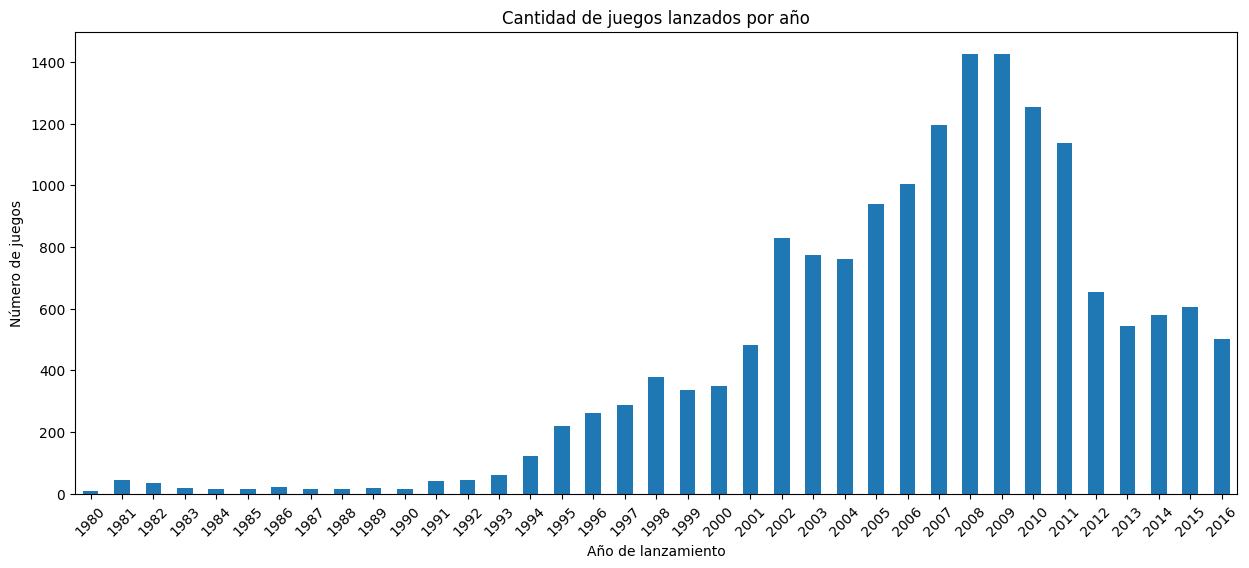

In [25]:
games_per_year = df.groupby('year_of_release')['name'].count()
#print(games_per_year)
plt.figure(figsize=(15, 6))
games_per_year.plot(kind='bar')
plt.title('Cantidad de juegos lanzados por año')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Número de juegos')
plt.xticks(rotation=45)
plt.show()

In [26]:
platform_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print("Ventas totales por plataforma:")
print(platform_sales.head(10))

Ventas totales por plataforma:
platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: total_sales, dtype: float64


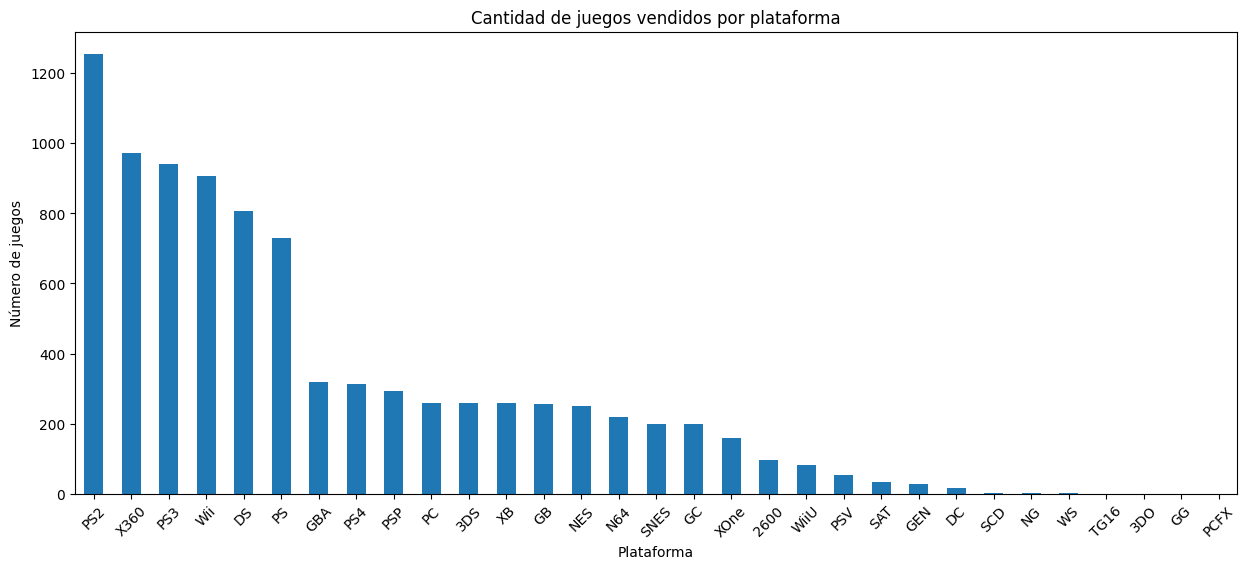

In [27]:
plt.figure(figsize=(15, 6))
platform_sales.plot(kind='bar')
plt.title('Cantidad de juegos vendidos por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Número de juegos')
plt.xticks(rotation=45)
plt.show()
top_platform = ['PS2', 'X360', 'PS3', 'Wii','DS']

In [28]:
top_platform_per_year = df[df['platform'].isin(top_platform)]
platform_year_sales = top_platform_per_year.groupby(['year_of_release', 'platform'])['total_sales'].sum()

pivot_table = top_platform_per_year.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack(fill_value=0)
print("Tabla pivote - Ventas por año y plataforma:")
print(pivot_table.head())

Tabla pivote - Ventas por año y plataforma:
platform           DS     PS2  PS3  Wii  X360
year_of_release                              
1985             0.02    0.00  0.0  0.0   0.0
2000             0.00   39.17  0.0  0.0   0.0
2001             0.00  166.43  0.0  0.0   0.0
2002             0.00  205.38  0.0  0.0   0.0
2003             0.00  184.31  0.0  0.0   0.0


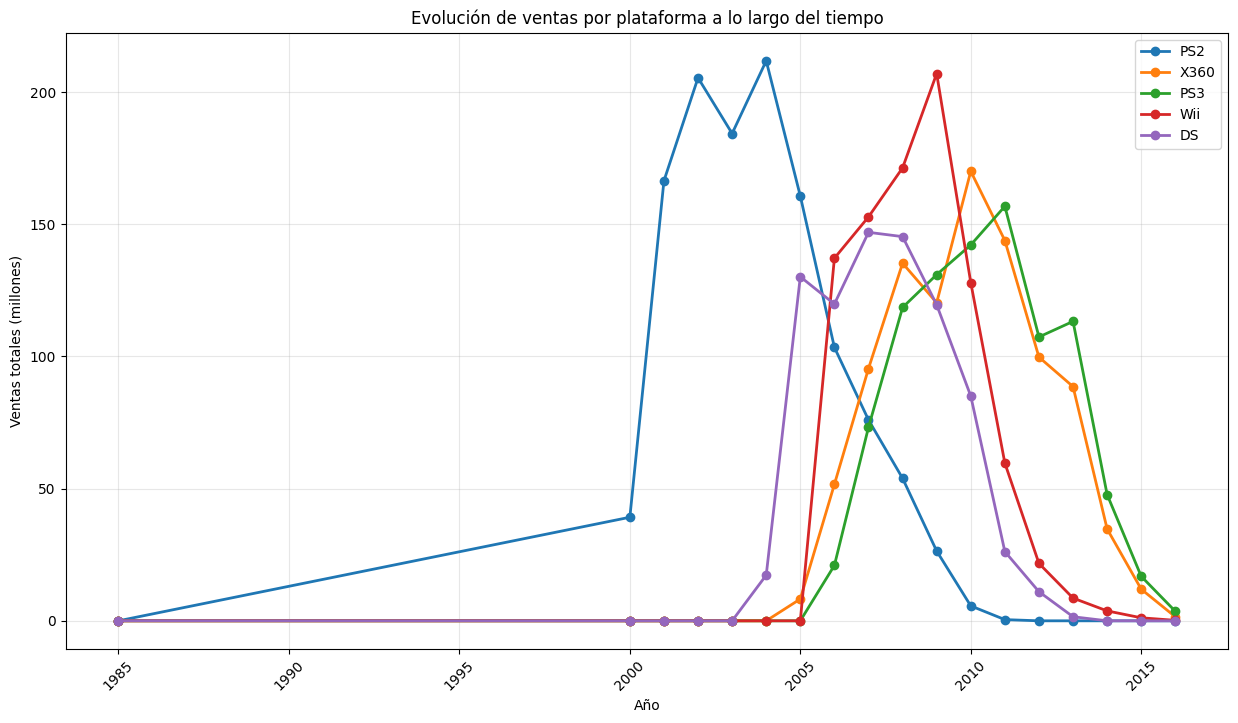

In [29]:
plt.figure(figsize=(15, 8))
for platform in top_platform:
    if platform in pivot_table.columns:
        plt.plot(pivot_table.index, pivot_table[platform], marker='o', label=platform, linewidth=2)

plt.title('Evolución de ventas por plataforma a lo largo del tiempo')
plt.xlabel('Año')
plt.ylabel('Ventas totales (millones)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.show()

### Podemos observar que el promedio de vida de cada plataforma varia al redor de una decada. Para las pltaformas con mayor venta de videojuegos, los datos relevantes comienzan en el año 2000 al 2016.

<div class="alert alert-block alert-success"> 
<b>Comentario de la revisora Iteración #1</b> <a class="tocSkip"></a>

Genial! Muy buen trabajo con las ventas por plataforma y los juegos lanzados por año. Además, se puede reconocer estos picos de diferentes plataformas de video juegos en las épocas datadas. Buen trabajo!
</div>

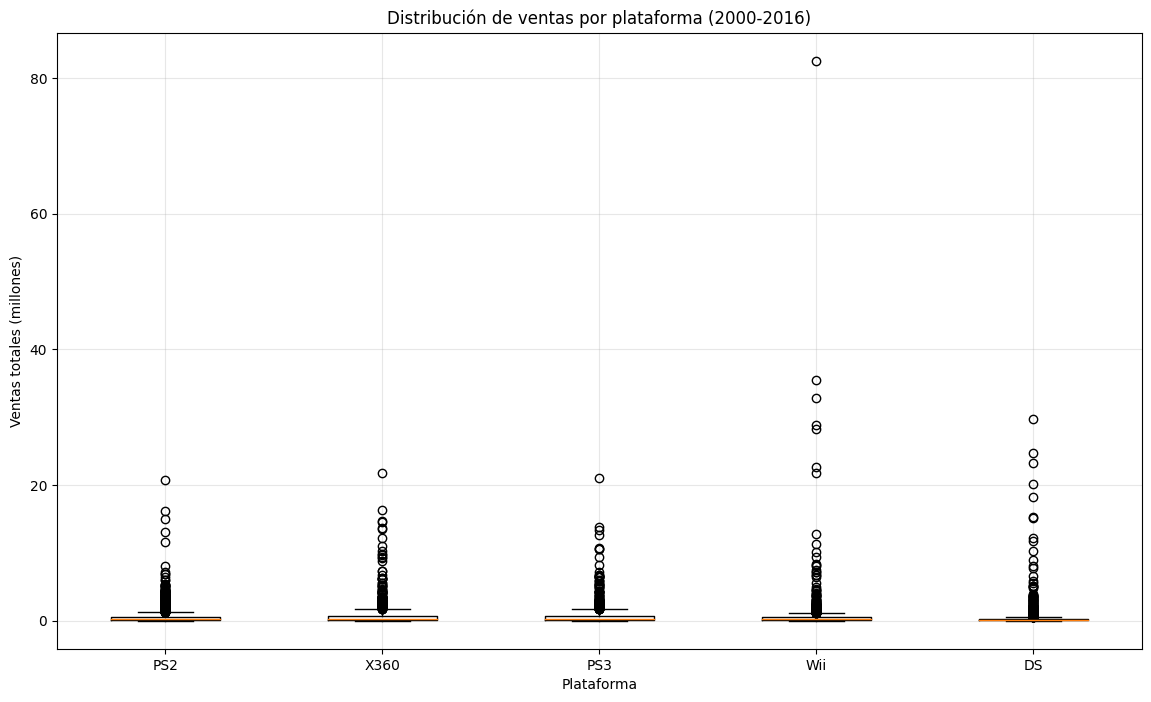

Estadísticas descriptivas por plataforma:

PS2:
  Mediana: 0.230
  Media: 0.581
  Q1: 0.080
  Q3: 0.560
  Juegos: 2161

X360:
  Mediana: 0.280
  Media: 0.770
  Q1: 0.110
  Q3: 0.757
  Juegos: 1262

PS3:
  Mediana: 0.270
  Media: 0.706
  Q1: 0.110
  Q3: 0.750
  Juegos: 1331

Wii:
  Mediana: 0.190
  Media: 0.688
  Q1: 0.080
  Q3: 0.482
  Juegos: 1320

DS:
  Mediana: 0.110
  Media: 0.375
  Q1: 0.050
  Q3: 0.270
  Juegos: 2151


In [30]:
plt.figure(figsize=(14, 8))
platforms_data = [top_platform_per_year[top_platform_per_year['platform'] == platform]['total_sales'] 
                  for platform in top_platform]

plt.boxplot(platforms_data, labels=top_platform)
plt.title('Distribución de ventas por plataforma (2000-2016)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas totales (millones)')
plt.grid(True, alpha=0.3)
plt.show()

# Estadísticas descriptivas por plataforma
print("Estadísticas descriptivas por plataforma:")
for platform in top_platform:
    platform_data = top_platform_per_year[top_platform_per_year['platform'] == platform]['total_sales']
    print(f"\n{platform}:")
    print(f"  Mediana: {platform_data.median():.3f}")
    print(f"  Media: {platform_data.mean():.3f}")
    print(f"  Q1: {platform_data.quantile(0.25):.3f}")
    print(f"  Q3: {platform_data.quantile(0.75):.3f}")
    print(f"  Juegos: {len(platform_data)}")

In [31]:
# Encontrar el juego con mayores ventas en Wii
wii_games = df[df['platform'] == 'Wii'].copy()
top_wii_game = wii_games.loc[wii_games['total_sales'].idxmax()]

print("Juego con mayores ventas en Wii:")
print(f"Nombre: {top_wii_game['name']}")
print(f"Ventas: {top_wii_game['total_sales']:.2f} millones")
print(f"Año: {top_wii_game['year_of_release']}")
print(f"Género: {top_wii_game['genre']}")

# Ver los top 5 juegos de Wii
print("\nTop 5 juegos de Wii por ventas:")
top_5_wii = wii_games.nlargest(5, 'total_sales')[['name', 'total_sales', 'year_of_release', 'genre']]
print(top_5_wii)

Juego con mayores ventas en Wii:
Nombre: Wii Sports
Ventas: 82.54 millones
Año: 2006
Género: Sports

Top 5 juegos de Wii por ventas:
                        name  total_sales  year_of_release     genre
0                 Wii Sports        82.54             2006    Sports
2             Mario Kart Wii        35.52             2008    Racing
3          Wii Sports Resort        32.77             2009    Sports
7                   Wii Play        28.91             2006      Misc
8  New Super Mario Bros. Wii        28.32             2009  Platform


### Al analizar las ventas spor plataforma observamos que mantienen un promedio similar de ventas que no supera los 700mil juegos. En comportamientos que llaman la atencion, podemos observar que la Wii tiene un valor atipico muy interesante, al analizar pudimos localizar el juego que es el wiisport, su exito de venta puede deberse a su dinamica de juego revolucionaria para la epoca que aprovechaba la mayoria de los nuevos sensores que incluia la consola y por ende ocasionaba una dinamica de jiuego interesante y muy distintiva de la interfaz clasica para controlar los vieojuegos. Agregado a eso podemos obersvar que aunque la PS2 tuvo mayor volumen de venta, en comparacion con la cantidad de juegos lanzados (o registtrados en el dataset) podemos ver que realmente quien  mantiene mejor propocion en ventas es la XBOX 360 teniendo un promedio del .770 millones de ventas.

<div class="alert alert-block alert-danger"> 
<b>Comentario de la revisora Iteración #1</b> <a class="tocSkip"></a>

El reconocimiento del tiempo de vida de las plataformas es correcto, como mencionas, se nota alrededor de una decada. La elección que dices de datos relevantes solo desde el 2010 es correcta, pero aun no has realizado el filtrado de datos donde explicitamente solo empieces a usar los datos a partir de esa fecha para el resto del analisis. 

Además, te invito a mejorar el grafico de caja limitando el eje Y de forma que se pueda observar mejor la tendencia media de cada plataforma y no se achaten las cajas. 

ANÁLISIS DE X360: CRÍTICAS VS VENTAS
Total de juegos X360: 1262
Juegos con critic_score: 1262
Juegos con user_score: 1262


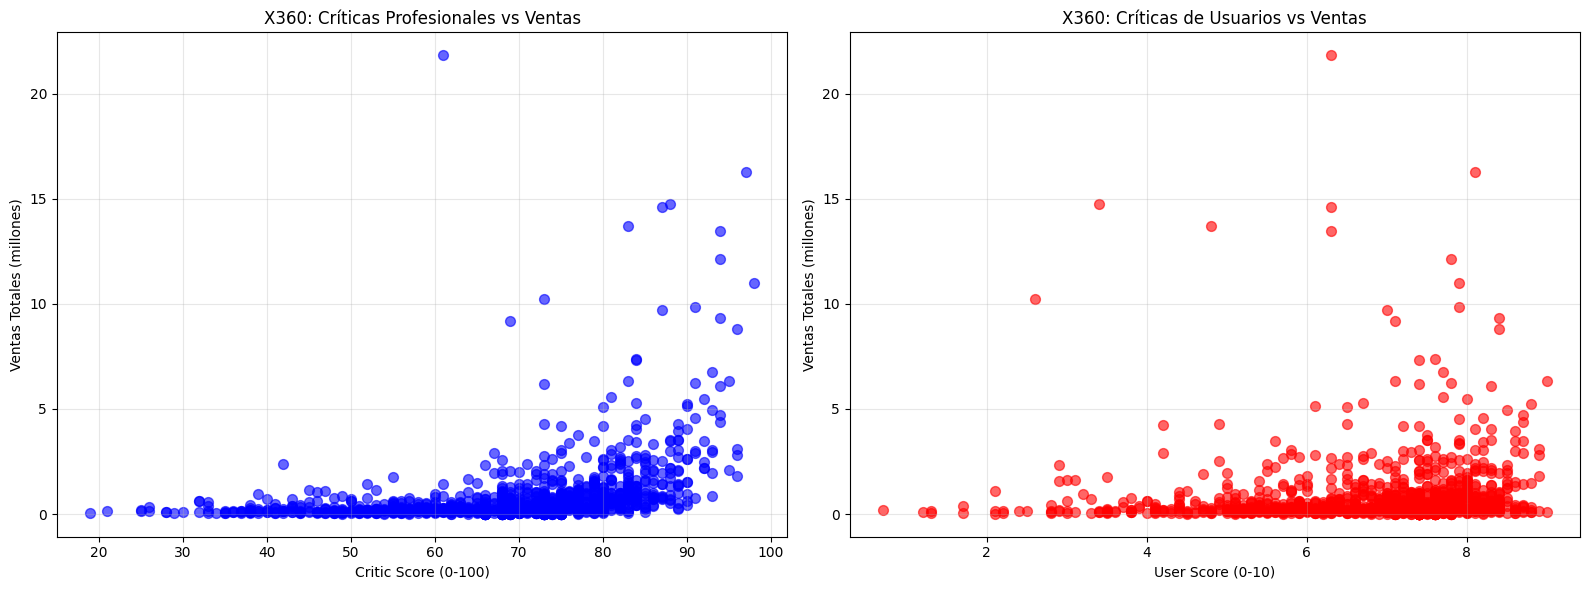

CORRELACIONES
Correlación Critic Score - Ventas: 0.363
Correlación User Score - Ventas: 0.064


In [32]:
x360_games = df[df['platform'] == 'X360'].copy()

print("ANÁLISIS DE X360: CRÍTICAS VS VENTAS")
print(f"Total de juegos X360: {len(x360_games)}")
print(f"Juegos con critic_score: {x360_games['critic_score'].notna().sum()}")
print(f"Juegos con user_score: {x360_games['user_score'].notna().sum()}")

# Crear figura con subplots para comparar ambas críticas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Critic Score vs Total Sales
ax1.scatter(x360_games['critic_score'], x360_games['total_sales'], 
           alpha=0.6, color='blue', s=50)
ax1.set_xlabel('Critic Score (0-100)')
ax1.set_ylabel('Ventas Totales (millones)')
ax1.set_title('X360: Críticas Profesionales vs Ventas')
ax1.grid(True, alpha=0.3)

# Gráfico 2: User Score vs Total Sales
ax2.scatter(x360_games['user_score'], x360_games['total_sales'], 
           alpha=0.6, color='red', s=50)
ax2.set_xlabel('User Score (0-10)')
ax2.set_ylabel('Ventas Totales (millones)')
ax2.set_title('X360: Críticas de Usuarios vs Ventas')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calcular correlaciones
critic_corr = x360_games['critic_score'].corr(x360_games['total_sales'])
user_corr = x360_games['user_score'].corr(x360_games['total_sales'])

print(f"CORRELACIONES")
print(f"Correlación Critic Score - Ventas: {critic_corr:.3f}")
print(f"Correlación User Score - Ventas: {user_corr:.3f}")

### Generando los graficos de dispersion podemos obersvar una clara tendencia de mayor ventas entre mejor critica, parece ser que la relacion esta mas marcada en cuanto a criticas profesionales que la de los usuarios.

<div class="alert alert-block alert-success"> 
<b>Comentario de la revisora Iteración #1</b> <a class="tocSkip"></a>

Excelente trabajo con el analisis de la correlación de reseñas vs ventas. Como mencionas, se nota que las reseñas de críticos son de una influencia mayor sobre las ventas. 

In [33]:
print("TOP 3 JUEGOS MEJOR RANKEADOS POR PLATAFORMA")

all_top_games = []
for platform in top_platform:
    platform_data = df[df['platform'] == platform].copy()
    
    top_3 = platform_data.nlargest(3, 'critic_score')[['name', 'critic_score', 'user_score', 
                                                       'total_sales', 'year_of_release', 'genre']].copy()
    
    top_3['platform'] = platform
    top_3['rank'] = [1, 2, 3]
    
    print(f"{platform} - TOP 3 MEJOR RANKEADOS:")
    for idx, game in top_3.iterrows():
        print(f"  {game['rank']}. {game['name']}")
        print(f"     Critic Score: {game['critic_score']:.1f} | User Score: {game['user_score']:.1f}")
        print(f"     Ventas: {game['total_sales']:.2f}M | Año: {game['year_of_release']} | Género: {game['genre']}")
    print()
    
    all_top_games.append(top_3)

TOP 3 JUEGOS MEJOR RANKEADOS POR PLATAFORMA
PS2 - TOP 3 MEJOR RANKEADOS:
  1. Grand Theft Auto III
     Critic Score: 97.0 | User Score: 8.5
     Ventas: 13.10M | Año: 2001 | Género: Action
  2. Tony Hawk's Pro Skater 3
     Critic Score: 97.0 | User Score: 7.5
     Ventas: 4.42M | Año: 2001 | Género: Sports
  3. Metal Gear Solid 2: Sons of Liberty
     Critic Score: 96.0 | User Score: 8.7
     Ventas: 6.05M | Año: 2001 | Género: Action

X360 - TOP 3 MEJOR RANKEADOS:
  1. Grand Theft Auto IV
     Critic Score: 98.0 | User Score: 7.9
     Ventas: 11.00M | Año: 2008 | Género: Action
  2. Grand Theft Auto V
     Critic Score: 97.0 | User Score: 8.1
     Ventas: 16.27M | Año: 2013 | Género: Action
  3. The Elder Scrolls V: Skyrim
     Critic Score: 96.0 | User Score: 8.4
     Ventas: 8.79M | Año: 2011 | Género: Role-Playing

PS3 - TOP 3 MEJOR RANKEADOS:
  1. Grand Theft Auto IV
     Critic Score: 98.0 | User Score: 7.5
     Ventas: 10.50M | Año: 2008 | Género: Action
  2. Grand Theft Auto 

Ventas totales por género:
genre
Action          1744.17
Sports          1331.27
Shooter         1052.45
Role-Playing     934.56
Platform         827.77
Misc             802.51
Racing           728.67
Fighting         447.53
Simulation       389.97
Puzzle           242.57
Adventure        237.59
Strategy         174.23
Name: total_sales, dtype: float64


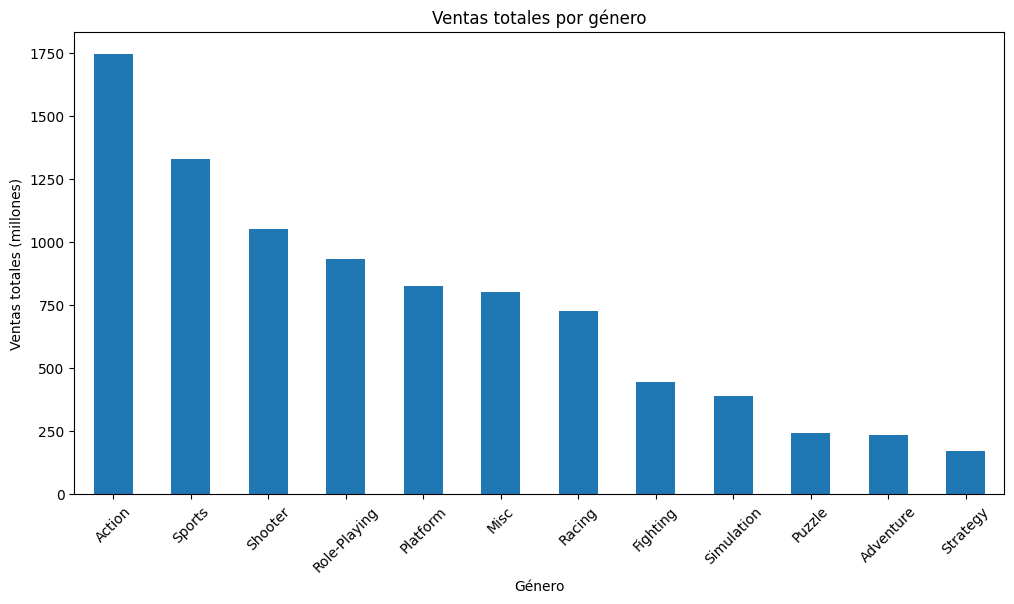

In [34]:
genre_sales = df.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
print("Ventas totales por género:")
print(genre_sales)

# Visualización
plt.figure(figsize=(12, 6))
genre_sales.plot(kind='bar')
plt.title('Ventas totales por género')
plt.xlabel('Género')
plt.ylabel('Ventas totales (millones)')
plt.xticks(rotation=45)
plt.show()

### Podemos obsesrvar que algunos juegos son multiplataforma y coincide qu cuando mejor critica tienen tienden a tener mejores ventas, es importane notar que el juego de GTA V tuvo una cantidad de ventas mucho mayor a comparacion de los demas y no es el mejor rankeado. Esto nos muestra que aunque puede ser una ayuda el raking profesiona, relaamente no es una ley que al tener buen raking tengamos buen rendimiento en ventas.

<div class="alert alert-block alert-success"> 
<b>Comentario de la revisora Iteración #1</b> <a class="tocSkip"></a>

Buen trabajo con el analisis por genero. Muy buen apunte el que haces frente a la relacion ventas y ranking, ya que como mencionas, no siempre es directa ni se cumple obligatoriamente. 

In [35]:
# Análisis de plataformas principales por región
print("ANÁLISIS DE PLATAFORMAS PRINCIPALES POR REGIÓN")

# Top 5 plataformas por región
na_platforms = df.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
eu_platforms = df.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
jp_platforms = df.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

print("TOP 5 PLATAFORMAS - NORTEAMÉRICA:")
print(na_platforms)
print("\nTOP 5 PLATAFORMAS - EUROPA:")
print(eu_platforms)
print("\nTOP 5 PLATAFORMAS - JAPÓN:")
print(jp_platforms)

ANÁLISIS DE PLATAFORMAS PRINCIPALES POR REGIÓN
TOP 5 PLATAFORMAS - NORTEAMÉRICA:
platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64

TOP 5 PLATAFORMAS - EUROPA:
platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64

TOP 5 PLATAFORMAS - JAPÓN:
platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64


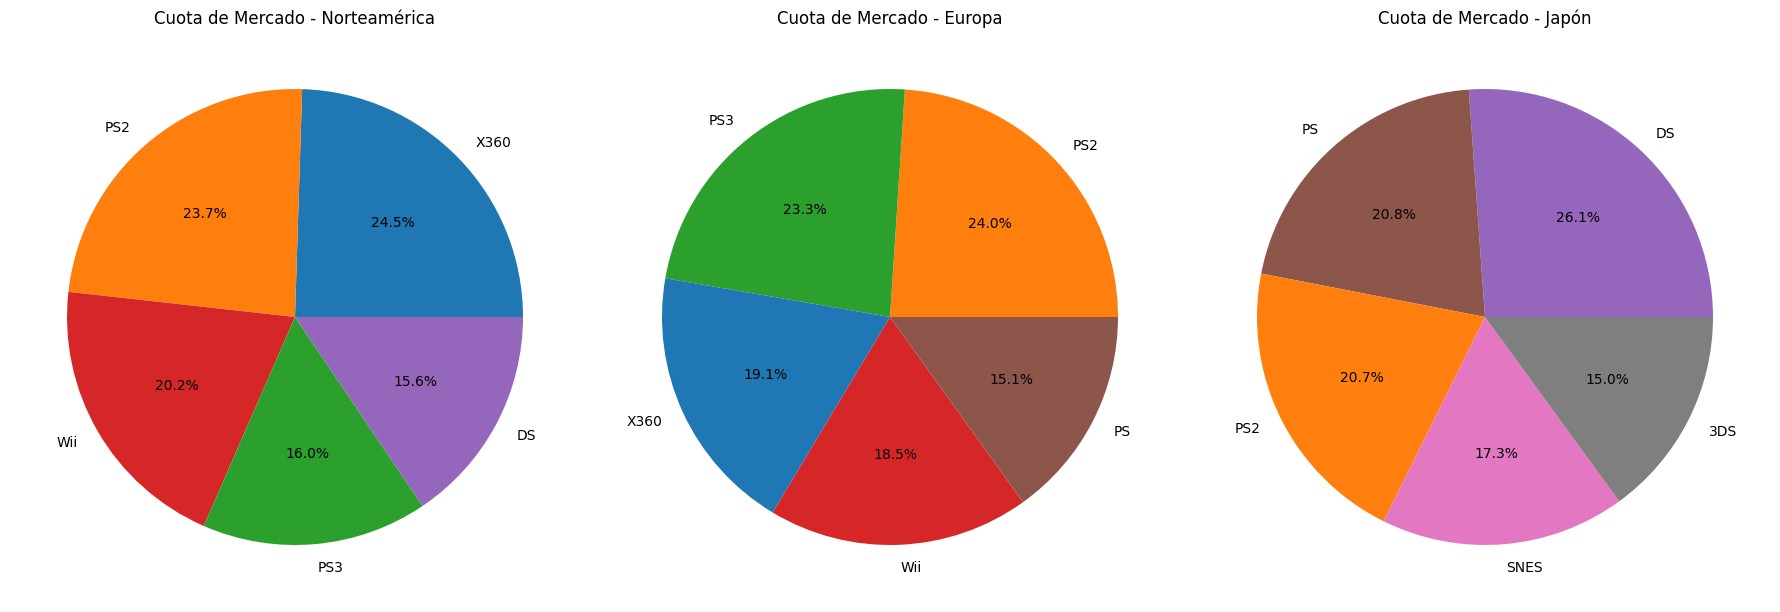

In [36]:
platform_colors = {
    'X360': '#1f77b4',    # azul
    'PS2': '#ff7f0e',     # naranja
    'PS3': '#2ca02c',     # verde
    'Wii': '#d62728',     # rojo
    'DS': '#9467bd',      # púrpura
    'PS': '#8c564b',      # marrón
    'SNES': '#e377c2',    # rosa
    '3DS': '#7f7f7f'      # gris
}
#Funcion para mantener el color de la plataforma.
def create_regional_pie_chart(data, title, ax, platform_colors):
    colors = [platform_colors.get(platform, '#cccccc') for platform in data.index]
    data.plot(kind='pie', ax=ax, autopct='%1.1f%%', colors=colors)
    ax.set_title(title)
    ax.set_ylabel('')

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

create_regional_pie_chart(na_platforms, 'Cuota de Mercado - Norteamérica', axes[0], platform_colors)
create_regional_pie_chart(eu_platforms, 'Cuota de Mercado - Europa', axes[1], platform_colors)
create_regional_pie_chart(jp_platforms, 'Cuota de Mercado - Japón', axes[2], platform_colors)

plt.tight_layout()
plt.show()

In [37]:
# Análisis de generos principales por región
print("ANÁLISIS DE GÉNEROS PRINCIPALES POR REGIÓN")

# Top 5 generos por región
na_genre = df.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
eu_genre = df.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
jp_genre = df.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

print("TOP 5 GÉNEROS - NORTEAMÉRICA:")
print(na_genre)
print("\nTOP 5 PLATAFORMAS - EUROPA:")
print(eu_genre)
print("\nTOP 5 PLATAFORMAS - JAPÓN:")
print(jp_genre)

ANÁLISIS DE GÉNEROS PRINCIPALES POR REGIÓN
TOP 5 GÉNEROS - NORTEAMÉRICA:
genre
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
Name: na_sales, dtype: float64

TOP 5 PLATAFORMAS - EUROPA:
genre
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74
Name: eu_sales, dtype: float64

TOP 5 PLATAFORMAS - JAPÓN:
genre
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11
Name: jp_sales, dtype: float64


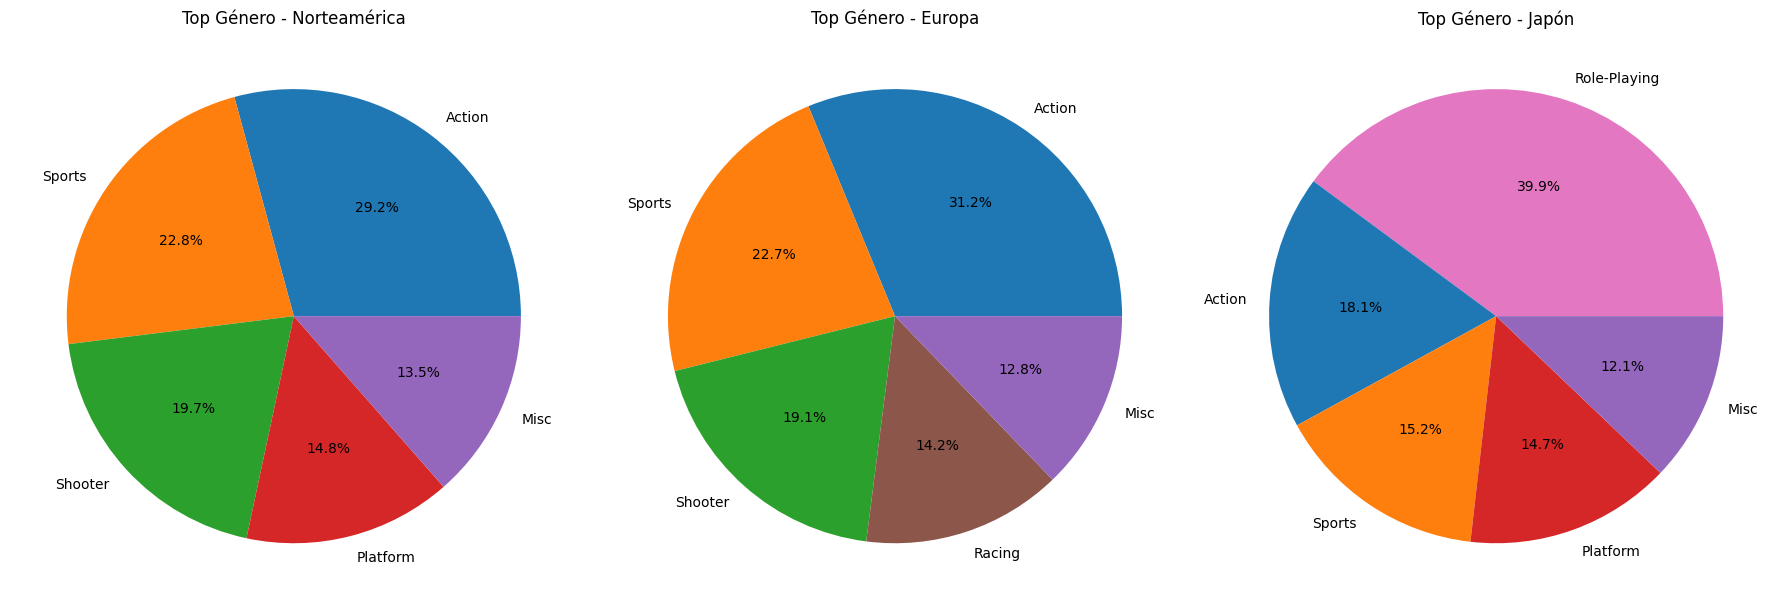

In [38]:
genre_colors = {
    'Action': '#1f77b4',    # azul
    'Sports': '#ff7f0e',     # naranja
    'Shooter': '#2ca02c',     # verde
    'Platform': '#d62728',     # rojo
    'Misc': '#9467bd',      # púrpura
    'Racing': '#8c564b',      # marrón
    'Role-Playing': '#e377c2',    # rosa
}
#Funcion para mantener el color del genero.
def create_regional_pie_chart(data, title, ax, genre_colors):
    colors = [genre_colors.get(genre, '#cccccc') for genre in data.index]
    data.plot(kind='pie', ax=ax, autopct='%1.1f%%', colors=colors)
    ax.set_title(title)
    ax.set_ylabel('')

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

create_regional_pie_chart(na_genre, 'Top Género - Norteamérica', axes[0], genre_colors)
create_regional_pie_chart(eu_genre, 'Top Género - Europa', axes[1], genre_colors)
create_regional_pie_chart(jp_genre, 'Top Género - Japón', axes[2], genre_colors)

plt.tight_layout()
plt.show()

In [39]:
# Ver las clasificaciones ESRB únicas
print("Clasificaciones ESRB disponibles:")
print(df['rating'].value_counts())
esrb_sales = df.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum()
print(esrb_sales)

Clasificaciones ESRB disponibles:
E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64
        na_sales  eu_sales  jp_sales
rating                              
AO          1.26      0.61      0.00
E        1292.99    710.25    198.11
E10+      353.32    188.52     40.20
EC          1.53      0.11      0.00
K-A         2.56      0.27      1.46
M         748.48    483.97     64.24
RP          0.00      0.08      0.00
T         759.75    427.03    151.40


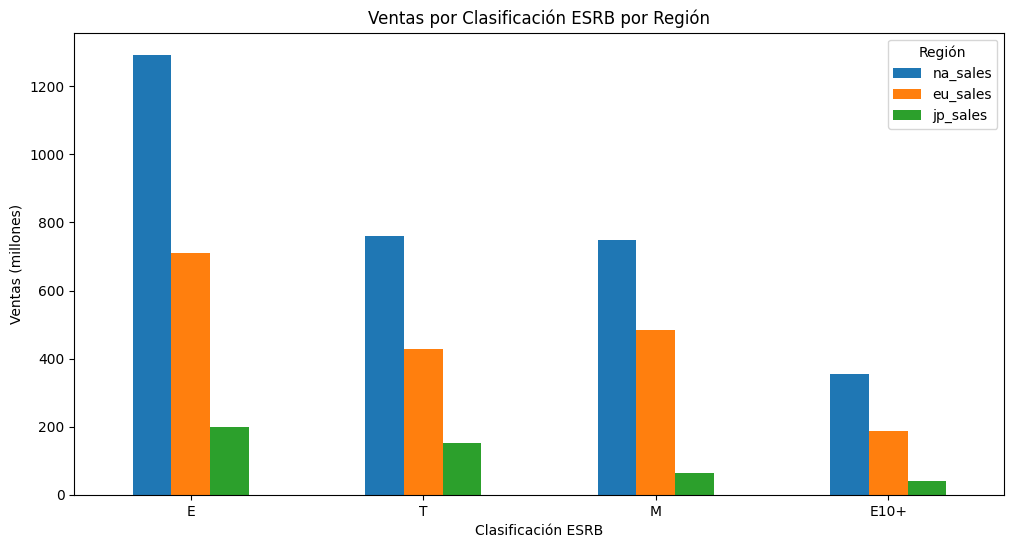

In [40]:
# Crear el gráfico de barras agrupadas
esrb_sales_filtered = esrb_sales.loc[['E', 'T', 'M', 'E10+']]  # Solo las principales

ax = esrb_sales_filtered.plot(kind='bar', figsize=(12, 6))
plt.title('Ventas por Clasificación ESRB por Región')
plt.xlabel('Clasificación ESRB')
plt.ylabel('Ventas (millones)')
plt.legend(title='Región')
plt.xticks(rotation=0)
plt.show()


### Norteamérica: 
#### Tiene muy segementado en las tres grandes compañias (PlyStation, Xbox y Nintendo). Prefiere juegos de accion y deporte que sean aptos para toda la familia, seguidos por jeugos para dolecentes y maduros en similar medida.
### Europa: 
#### En europa tienen una preferencia muy marcada hacia la PlayStation con juegos de accion y deporte que sean aptos para toda la familia, seguidos en tendencia similar adolescentes y maduros.
### Japón: 
#### Japon tiene un comportamiento muy peculiar ya que se puede observar que dominan el mercado la PlayStation y Nintendo, siendo que las consolas extranjera casi no tienen presencia en su mercado, en general prefieren por mucho los juegos de rol y que sean aptos para toda la familia y en menor medida los que son para adolescentes.


<div class="alert alert-block alert-success"> 
<b>Comentario de la revisora Iteración #1</b> <a class="tocSkip"></a>

Excelente trabajo con el analisis regional. Como mencionas, es notable el comportamiento particular que tiene Japon frente a las demás regiones, esto se nota por la influencia cultural de las diferentes regiones. 

Hipótesis a probar:

### 1. Hipótesis sobre plataformas: Xbox One vs PC
- H₀ (hipótesis nula): Las calificaciones promedio de usuarios para Xbox One y PC son iguales
- H₁ (hipótesis alternativa): Las calificaciones promedio de usuarios para Xbox One y PC son diferentes

In [41]:
# Verificar si tenemos datos de Xbox One y PC
print("Plataformas disponibles que contienen 'XOne' o 'PC':")
xbox_platforms = df[df['platform'].str.contains('XOne|Xbox', case=False, na=False)]['platform'].unique()
pc_platforms = df[df['platform'].str.contains('PC', case=False, na=False)]['platform'].unique()
print("Xbox platforms:", xbox_platforms)
print("PC platforms:", pc_platforms)

Plataformas disponibles que contienen 'XOne' o 'PC':
Xbox platforms: ['XOne']
PC platforms: ['PC' 'PCFX']


In [42]:
xbox_scores = df[df['platform'] == 'XOne']['user_score'].dropna()
pc_scores = df[df['platform'] == 'PC']['user_score'].dropna()

print("HIPÓTESIS 1: Xbox One vs PC")
print(f"Juegos Xbox One con user_score: {len(xbox_scores)}")
print(f"Juegos PC con user_score: {len(pc_scores)}")
print(f"Promedio Xbox One: {xbox_scores.mean():.2f}")
print(f"Promedio PC: {pc_scores.mean():.2f}")
t_stat_platforms, p_value_platforms = stats.ttest_ind(xbox_scores, pc_scores)

print(f"\nRESULTADOS DE LA PRUEBA:")
print(f"Estadístico t: {t_stat_platforms:.2f}")
print(f"Valor p: {p_value_platforms:.2f}")

alpha = 0.03
if p_value_platforms < alpha:
    print(f"Conclusión: Rechazamos H₀ (p < {alpha})")
    print("Las calificaciones promedio son significativamente diferentes")
else:
    print(f"Conclusión: No rechazamos H₀ (p >= {alpha})")
    print("No hay evidencia suficiente de diferencia significativa")

HIPÓTESIS 1: Xbox One vs PC
Juegos Xbox One con user_score: 247
Juegos PC con user_score: 974
Promedio Xbox One: 6.76
Promedio PC: 7.16

RESULTADOS DE LA PRUEBA:
Estadístico t: -4.15
Valor p: 0.00
Conclusión: Rechazamos H₀ (p < 0.03)
Las calificaciones promedio son significativamente diferentes


### 2. Hipótesis sobre géneros: Action vs Sports
- H₀ (hipótesis nula): Las calificaciones promedio de usuarios para géneros Action y Sports son iguales
- H₁ (hipótesis alternativa): Las calificaciones promedio de usuarios para géneros Action y Sports son diferentes

In [43]:
action_scores = df[df['genre'] == 'Action']['user_score']
sports_scores = df[df['genre'] == 'Sports']['user_score']

print("HIPÓTESIS 2: Action vs Sports")
print(f"Juegos Action con user_score: {len(action_scores)}")
print(f"Juegos Sports con user_score: {len(sports_scores)}")
print(f"Promedio Action: {action_scores.mean():.2f}")
print(f"Promedio Sports: {sports_scores.mean():.2f}")

# Realizar prueba t de Student para muestras independientes
t_stat_genres, p_value_genres = stats.ttest_ind(action_scores, sports_scores)

print(f"\nRESULTADOS DE LA PRUEBA:")
print(f"Estadístico t: {t_stat_genres:.2f}")
print(f"Valor p: {p_value_genres:.2f}")

alpha = 0.03
if p_value_genres < alpha:
    print(f"Conclusión: Rechazamos H₀ (p < {alpha})")
    print("Las calificaciones promedio son significativamente diferentes")
else:
    print(f"Conclusión: No rechazamos H₀ (p >= {alpha})")
    print("No hay evidencia suficiente de diferencia significativa")

HIPÓTESIS 2: Action vs Sports
Juegos Action con user_score: 3369
Juegos Sports con user_score: 2348
Promedio Action: 7.21
Promedio Sports: 7.19

RESULTADOS DE LA PRUEBA:
Estadístico t: 0.62
Valor p: 0.53
Conclusión: No rechazamos H₀ (p >= 0.03)
No hay evidencia suficiente de diferencia significativa


<div class="alert alert-block alert-success"> 
<b>Comentario de la revisora Iteración #1</b> <a class="tocSkip"></a>

Hiciste un excelente trabajo con las pruebas de hipótesis. Tu eleccion de los tipos de prueba y los niveles de significancia es muy acertada. Además, las justificaciones que proporcionas para interpretar los resultados le dan un completo desarrollo al trabajo.

# CONCLUSIONES GENERALES DEL PROYECTO
En este análisis examinamos el mercado global de videojuegos utilizando datos de ventas, 
calificaciones y características de más de 16,000 juegos entre 1980-2016, 
enfocándose en identificar patrones regionales y factores de éxito comercial.

## Hallazgos principales:
### Plataformas más exitosas:
- PS2 lideró en ventas totales (1,255M)
- Xbox 360 tuvo mejor promedio de ventas por juego (0.77M)
- Cada plataforma tiene aproximadamente 10 años de vida útil

## Diferencias regionales clave:
- Norteamérica: Prefiere Xbox 360, géneros Action/Sports/Shooter
- Europa: Domina PS2/PS3, similar a norteamerica pero con menos juegos del tipo "Shooter"
- Japón: Prefiere DS/PlayStation, fuerte preferencia por "Role-Playing" y casi no consumen juegos con calsificaion ESRB "M" o para adultos.

## Relación críticas-ventas:
- Correlación moderada entre críticas profesionales y ventas (0.363)
  Podemos observar que las criticas profesionales tienen cierto impacto en las ventas, pero tomando como ejemplo el GTAV que tuvo mucha mayor venta que otros juegos y no estuvo en el numero 1 de raking, realmente no es un factor desicivo a la hora de comprarlo para el usuario final.
- Críticas de usuarios tienen menor impacto en ventas (0.064)
  Podemos asumir de manera muy similar a lo que pasa con las criticas profesionales, con la diferencia de que realmente es mucho menos influente la recomendacion de los usuarios a la hora de comprar un juego. 

## Resultados de las hipótesis
### Hipótesis 1 (Xbox One vs PC): Rechazada - hay diferencias significativas
Realmente el promedio del ranking para jegos de PC es mayor que el del raking en XBOX One, superandolo por casi un punto porcentual en las calificaciones, hay que tomar en cuenta tambien que la base de juegos calificados para XBOX es mucho menor que la de pc y esto puede influir de manera negativa en la relacion propocional ya que al ser menos juegos calificados, si un juego tiene mala critica afecta en mayo medida a los jeugos de PC que pueden promediar un valor neutro con mayo facilidad.
### Hipótesis 2 (Action vs Sports): No rechazada - no hay diferencias significativas
En cuanto a lso generos de accion y deporte vemos que tenemos metricas mas equilibradas, los promedios de cada genero varian solo en decimas porcentuales lo cual nos indica que los usuarios los aceptan de manera similar y que ambos generos son populares.

## Recomendaciones para la industria
Podemos asumir en base a los datos que el genero con mayor aceptacion global es el de accion, seguido por el de juego de rol(aunque este esta especificamente marcado en Japon). Lo ideal seria seguir atacando juegos de accion para un mercado global y juegos de rol si se busca generar una comunidad en el mercado Japones que tienden a rechazar mas los juegos explicitos. En cuanto a las consolas yo recomderaria enfocarse en las de nueva generacion como PS4, XBOX ONE, 3DS, ya que las analizadas en el top son consolas que ya cumplieron en promedio 10 años en el mercado y su promedio de vida es bajo a comparacion con las de nueva generacion que estan iniciando o atidad de su vida util de juego.

# Contenido adicional
## Categorías de Clasificación
### E (Everyone / Todo Público): 
Generalmente apto para todas las edades; puede incluir violencia de caricatura o lenguaje moderado.
### E10+ (Everyone 10+ / Todos +10): 
Para mayores de 10 años; más violencia de fantasía, lenguaje moderado o temas sugerentes.
### T (Teen / Adolescentes): 
Para mayores de 13 años; puede incluir violencia, temas sugerentes, lenguaje fuerte o sangre.
### M (Mature / Maduro +17): 
Para mayores de 17 años; contenido intenso como violencia fuerte, sangre, contenido sexual o lenguaje fuerte.
### AO (Adults Only / Solo Adultos +18): 
Solo para adultos; violencia intensa prolongada, contenido sexual gráfico o apuestas con dinero real.
### RP (Rating Pending / Calificación Pendiente): 
Aún sin clasificación final, pero probable que sea M (Maduro +17). 

<div class="alert alert-block alert-success"> 
<b>Comentario de la revisora Iteración #1</b> <a class="tocSkip"></a>

Has hecho un excelente trabajo. Tus conclusiones son detalladas y muy utiles. Me gustan las recomendaciones estratégicas que propones, ya que recopilas cada uno de los resultados obtenidos en forma de propuesta de acción, este es justo el objetivo que tenemos como científicos de datos en este camino. Sigue así!
</div>